# Impots

In [1]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

#tensorboard: currently some error
#!pip install -U tensorboardcolab
#from tensorboardcolab import *

# json and pretty print
import json
import pprint

# to persist the numpy arrays data
import h5py

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

# Calculating Mean Absolute Percentage Error of predictions
def calc_mape(predicted_data, true_data):\
    return np.divide(np.sum(np.divide(np.absolute(predicted_data - true_data), true_data), 0), true_data.shape[0])

def plot_prediction(original, predicted):
    #fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    # Get subplots
    f, (plt1, plt2, plt3) = plt.subplots(3)
    # Get Daily errors
    
    a = original
    b = predicted
    if(len(original.shape) > 1):
        a = original.reshape(original.shape[0]*original.shape[1])
    if(len(predicted.shape) > 1):
        b = predicted.reshape(predicted.shape[0]*predicted.shape[1])
    
    daily_errors = abs(a - b)
    t = 7
    weekly_errors = temp = [np.float(np.sum(daily_errors[i:i+t])/t) for i in range(0, len(daily_errors), t)]
  
    # Calculate R2 metric
  
    # FROM wikipedia: 
    # Values of R2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. 
    # This would occur when the wrong model was chosen.
    m = np.mean(a)
    ss_tot = np.sum(np.power((a - m), 2))
    ss_res = np.sum(np.power((a - b), 2))
    r_square = 1 - (ss_res / ss_tot)
    r_square = "{0:.4f}".format(r_square)
    mape = calc_mape(b, a)
  
    # Get weekly errors
    # plot original vs predicted  
    plt1.plot(original, color='black', label = 'Original data') 
    plt1.plot(predicted, color='blue', label = 'Predicted data')

    # PLOT DAILY ERRORS
    plt2.plot(daily_errors, color='red')
    
    # PLOT WEEKLY ERRORS
    for i, e in enumerate(weekly_errors):
        plt3.bar(x=i*7, height=e, width=5, color='red')

    plt1.set_title('Actual and Predicted - R2: '+str(r_square) + ' - MAPE:'+str(mape))  
    plt2.set_title('Daily Errors')
    plt3.set_title('Weekly Errors')
  
    # IF YOU ARE USING COLAB, USE THIS:
    plt.subplots_adjust(left=1, bottom=1, right=4, top=3, wspace=None, hspace=1)
  
    # IF YOU ARE USING YOUR LOCAL AND SHOWING THE RESULTS USE THE FOLLOWING:
    # plt.subplots_adjust(left=0.05, bottom=0.05, right=0.90, top=0.90, wspace=None, hspace=0.4)
    
    plt.show()
    
def plot_prediction1(original, predicted):
  #fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
  
  # Get subplots
  f, (plt1, plt2, plt3) = plt.subplots(3)
  
  # Get Daily errors
  a = original
  b = predicted
  if(len(original.shape) > 1):
    a = original.reshape(original.shape[0]*original.shape[1])
    
  if(len(predicted.shape) > 1):
    b = predicted.reshape(predicted.shape[0]*predicted.shape[1])
    
  daily_errors = abs(a - b)
  
  t = 7
  weekly_errors = temp = [np.float(np.sum(daily_errors[i:i+t])/t) for i in range(0, len(daily_errors), t)]
  
  # Calculate R2 metric
  
  # FROM wikipedia: 
  # Values of R2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. 
  # This would occur when the wrong model was chosen.
  m = np.mean(a)
  ss_tot = np.sum(np.power((a - m), 2))
  ss_res = np.sum(np.power((a - b), 2))
  r_square = 1 - (ss_res / ss_tot)
  r_square = "{0:.4f}".format(r_square)
  
  # Get weekly errors
  # plot original vs predicted  
  plt1.plot(original, 
           color='black', 
           label = 'Original data') 
  plt1.plot(predicted,
           color='blue', 
           label = 'Predicted data')

  # PLOT DAILY ERRORS
  plt2.plot(daily_errors, color='red')

    
  # PLOT WEEKLY ERRORS
  for i, e in enumerate(weekly_errors):
    plt3.bar(x=i*7, height=e, width=5, color='red')

  plt1.set_title('Actual and Predicted - R2: '+str(r_square))  
  plt2.set_title('Daily Errors')
  plt3.set_title('Weekly Errors')
  
  # IF YOU ARE USING COLAB, USE THIS:
  plt.subplots_adjust(left=1, bottom=1, right=4, top=3, wspace=None, hspace=1)
  
  # IF YOU ARE USING YOUR LOCAL AND SHOWING THE RESULTS USE THE FOLLOWING:
  # plt.subplots_adjust(left=0.05, bottom=0.05, right=0.90, top=0.90, wspace=None, hspace=0.4)
  
  plt.show()

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#save_filename = '/content/gdrive/My Drive/deep_learning/_data/crude_oil/'
#daily_data_name = 'daily_crude_oil_83_19.csv'
#daily_data_name = pd.read_csv('daily_crude_oil_83_19.csv')
#print(daily_data_name.dtypes.value_counts())
#print(daily_data_name.columns.tolist())
#print('length of columns :', len(daily_data_name.columns.tolist()))
#print(daily_data_name.count())
#daily_data_name.head()

In [3]:
#!ls '/content/gdrive/My Drive/deep_learning/_data/crude_oil/'

# Get data

In [4]:
daily_data_name = 'data/daily_crude_oil_83_19.csv'
column_names = ['Date','Price',	'Open',	'High', 'Low',	'Vol.',	'Change %']

In [5]:
# get daily data wht pandas
daily_data = pd.read_csv(daily_data_name)

In [6]:
def getVolumeAsFloat(_lst):
  l = len(_lst)
  result = np.zeros(l)
  for i in range(l):
    vol = _lst[i]
    if 'M' in vol:
      _id = vol.index('M')
      _mlt = 1000000
    elif 'K' in vol:
      _id = vol.index('K')
      _mlt = 1000
    else:
      _id = -1

    result[i] = float(vol[:_id]) * _mlt
  return result

In [7]:
# returns normalized dataset between a and b
def minmax_norm(dataset, a, b):
  # NORMALIZE DATASET
  d = dataset
  mi = np.min(dataset)
  ma = np.max(dataset)

  norm_dataset = ((b-a) * ((d - mi)/(ma - mi))) + a
  return norm_dataset

def minmax_denorm(old_data, val, a=-1, b=1):
  mi = min(old_data)
  ma = max(old_data)

  return ((val - a) * (ma-mi) / (b-a)) + mi


def get_test(X, percentage=0.9):
    iXPercentage = int(len(X) * percentage) 
    X_train_val = X[0:iXPercentage]
    X_test = X[iXPercentage:]
    return X_train_val, X_test

In [8]:
def get_data_chunks(d_list, windows, quantity=False):
  length = len(d_list[0])
  step = 1
  forecast = 1
  
  data_dict = {}
  for window in windows:
    X = []
    Y = []
    for i in range(0, length, step):
      try:
        # Get windowed data
        windowed_features_list = []
        for j in range(len(d_list)):
          windowed_features_list.append(d_list[j][i:i+window])

        # ALWAYS TAKE THE FIRST data 
        if quantity:
          y_i = d_list[1][i + window + forecast - 1] # get volume important.
        else:
          y_i = d_list[0][i + window + forecast - 1] # get price
        x_i = np.column_stack(tuple(windowed_features_list))
      except Exception as e:
        print(e)
        break

      X.append(x_i)
      Y.append(y_i)
    data_dict[window] = {'X': np.array(X), 'Y': np.array(Y)}
    
  return data_dict  

# Daily

In [9]:
daily_data.head()

,Date,Price,Vol.
0,"Mar 31, 1983",29.27,0.52K
1,"Apr 04, 1983",29.44,0.16K
2,"Apr 05, 1983",29.71,0.18K
3,"Apr 06, 1983",29.90,0.39K
4,"Apr 07, 1983",30.17,0.82K


In [10]:
daily_prices = np.array(daily_data[column_names[1]])
daily_volumes = np.array(daily_data[column_names[5]])
daily_volumes = getVolumeAsFloat(daily_volumes)

In [11]:
# Extract Test
daily_prices, test_daily_prices = get_test(daily_prices)
daily_volumes, test_daily_volumes = get_test(daily_volumes)

In [12]:
norm_daily_prices = minmax_norm(daily_prices, a=-1, b=1)
norm_daily_volumes = minmax_norm(daily_volumes, a=-1, b=1)

## volume

In [13]:
data_dict = get_data_chunks(d_list = [norm_daily_prices, norm_daily_volumes], 
                            windows = [6, 8, 12], 
                            quantity=True)

index 8108 is out of bounds for axis 0 with size 8108
index 8108 is out of bounds for axis 0 with size 8108
index 8108 is out of bounds for axis 0 with size 8108


## price

In [14]:
data_dict = get_data_chunks(d_list = [norm_daily_prices, norm_daily_volumes], 
                            windows = [6, 8, 12], 
                            quantity=False)

index 8108 is out of bounds for axis 0 with size 8108
index 8108 is out of bounds for axis 0 with size 8108
index 8108 is out of bounds for axis 0 with size 8108


# Train

In [36]:
  def build_bidir_lstm_model(tensor_shape):
    # L2 norm regularizer
    regularizer = tf.keras.regularizers.l2(0.01)

    # XAVIER INITIALIZER
#    initializer = tf.keras.initializers.glorot_uniform()

    model = tf.keras.Sequential()

  # hyperbolic tangent is automatically seleceted as activation function
    units = tensor_shape[0]
    model.add(layers.Bidirectional(layers.LSTM(units, return_sequences=True), batch_input_shape=(None, tensor_shape[0], tensor_shape[1])))
    #model.add(layers.LSTM(units, 
                          #batch_input_shape=(None, tensor_shape[0], tensor_shape[1]),
                          #recurrent_regularizer=regularizer,
                          #bias_regularizer=regularizer, 
                          #kernel_regularizer=regularizer
                         #))


    #model.add(layers.LSTM(units, return_sequences=True))
    #model.add(layers.LSTM(units))
    
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    
    return model

In [37]:
w = 6
b = 64

In [38]:
model = build_bidir_lstm_model(tensor_shape=(w, 2))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 6, 12)             432       
_________________________________________________________________
dense_5 (Dense)              (None, 6, 32)             416       
_________________________________________________________________
dense_6 (Dense)              (None, 6, 32)             1056      
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 193       
Total params: 2,097
Trainable params: 2,097
Non-trainable params: 0
_________________________________________________________________


In [40]:
save_filename = 'models/'
print('save_filename: ' + save_filename)
learning_rate=0.001
epochs=10000
verbose=1
model_save_name = 'models/daily_crude_oil_bidirlstm_model_w6_b64'
    
opt_1 = tf.keras.optimizers.Adam(learning_rate)
    
loss_func = tf.keras.losses.mean_squared_error

metrics = []
metrics.append(tf.keras.metrics.mean_absolute_error)
metrics.append(tf.keras.metrics.mean_squared_error)
metrics.append(tf.keras.metrics.mean_absolute_percentage_error)

print("Model will be saved at: "+model_save_name)
model.compile(optimizer=opt_1, 
                  loss=loss_func, 
                  metrics=metrics)
    
callbacks = []
cp = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_name, verbose=1, save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
    
callbacks.append(cp)
callbacks.append(early_stop)    

save_filename: models/
Model will be saved at: models/daily_crude_oil_bidirlstm_model_lstm_w6_b64


In [41]:
  def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_val = X[iXPercentage:]
    Y_val = y[iYPercentage:]
    return X_train, X_val, Y_train, Y_val

In [42]:
nX = data_dict[w]['X']
nY =data_dict[w]['Y']
X_train, X_val, Y_train, Y_val = get_train_validation(nX, nY)

In [43]:
print('X_train: '+str(X_train.shape))
print('X_val: '+str(X_val.shape))
#print('X_test: '+str(X_test.shape))

X_train: (6481, 6, 2)
X_val: (1621, 6, 2)


In [44]:
print(X_train[0])
print(Y_train[0])
print('*'*50)
print(X_train[1])
print(Y_train[1])
print('*'*50)

[[-0.72047157 -0.99865345]
 [-0.71795062 -0.99960396]
 [-0.71394676 -0.99955115]
 [-0.71112924 -0.99899669]
 [-0.70712538 -0.99786136]
 [-0.70401127 -0.99904949]]
-0.7059390524208498
**************************************************
[[-0.71795062 -0.99960396]
 [-0.71394676 -0.99955115]
 [-0.71112924 -0.99899669]
 [-0.70712538 -0.99786136]
 [-0.70401127 -0.99904949]
 [-0.70593905 -0.99931352]]
-0.6973381775042634
**************************************************


In [45]:
history = model.fit(X_train, Y_train, 
                    epochs = epochs,  batch_size = b, 
                    verbose=verbose, validation_data=(X_val, Y_val), validation_split=0.8, callbacks=callbacks)

Train on 6481 samples, validate on 1621 samples
Epoch 1/10000
6464/6481 [============================>.] - ETA: 0s - loss: 0.0738 - mean_absolute_error: 0.1601 - mean_squared_error: 0.0738 - mean_absolute_percentage_error: 33.8897
Epoch 00001: val_loss improved from inf to 0.00576, saving model to models/daily_crude_oil_bidirlstm_model_lstm_w6_b64
6481/6481 [==============================] - 7s 1ms/step - loss: 0.0736 - mean_absolute_error: 0.1597 - mean_squared_error: 0.0736 - mean_absolute_percentage_error: 33.8234 - val_loss: 0.0058 - val_mean_absolute_error: 0.0650 - val_mean_squared_error: 0.0058 - val_mean_absolute_percentage_error: 103.1632
Epoch 2/10000
6336/6481 [============================>.] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0227 - mean_squared_error: 0.0012 - mean_absolute_percentage_error: 8.5313
Epoch 00002: val_loss improved from 0.00576 to 0.00318, saving model to models/daily_crude_oil_bidirlstm_model_lstm_w6_b64
6481/6481 [============================

Epoch 15/10000
6464/6481 [============================>.] - ETA: 0s - loss: 4.2640e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 4.2640e-04 - mean_absolute_percentage_error: 5.0829
Epoch 00015: val_loss did not improve from 0.00123
6481/6481 [==============================] - 3s 400us/step - loss: 4.2741e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 4.2741e-04 - mean_absolute_percentage_error: 5.0807 - val_loss: 0.0012 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0012 - val_mean_absolute_percentage_error: 82.9024
Epoch 16/10000
6400/6481 [============================>.] - ETA: 0s - loss: 4.1146e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 4.1146e-04 - mean_absolute_percentage_error: 5.2204
Epoch 00016: val_loss did not improve from 0.00123
6481/6481 [==============================] - 4s 644us/step - loss: 4.1244e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 4.1244e-04 - mean_absolute_percentage_error: 5.2566 - val_loss: 0.0015 -

Epoch 44/10000
6336/6481 [============================>.] - ETA: 0s - loss: 2.9886e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.9886e-04 - mean_absolute_percentage_error: 4.4151
Epoch 00044: val_loss did not improve from 0.00091
6481/6481 [==============================] - 3s 397us/step - loss: 3.0311e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 3.0311e-04 - mean_absolute_percentage_error: 4.3806 - val_loss: 0.0022 - val_mean_absolute_error: 0.0411 - val_mean_squared_error: 0.0022 - val_mean_absolute_percentage_error: 106.3133
Epoch 45/10000
6400/6481 [============================>.] - ETA: 0s - loss: 2.9941e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.9941e-04 - mean_absolute_percentage_error: 4.3982
Epoch 00045: val_loss did not improve from 0.00091
6481/6481 [==============================] - 3s 396us/step - loss: 2.9779e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.9779e-04 - mean_absolute_percentage_error: 4.3744 - val_loss: 0.0011 

Epoch 59/10000
6336/6481 [============================>.] - ETA: 0s - loss: 3.0022e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 3.0022e-04 - mean_absolute_percentage_error: 4.1028
Epoch 00059: val_loss did not improve from 0.00077
6481/6481 [==============================] - 5s 702us/step - loss: 3.0490e-04 - mean_absolute_error: 0.0112 - mean_squared_error: 3.0490e-04 - mean_absolute_percentage_error: 4.1080 - val_loss: 9.3601e-04 - val_mean_absolute_error: 0.0241 - val_mean_squared_error: 9.3601e-04 - val_mean_absolute_percentage_error: 75.7125
Epoch 60/10000
6464/6481 [============================>.] - ETA: 0s - loss: 3.1276e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 3.1276e-04 - mean_absolute_percentage_error: 4.1771
Epoch 00060: val_loss did not improve from 0.00077
6481/6481 [==============================] - 3s 451us/step - loss: 3.1321e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 3.1321e-04 - mean_absolute_percentage_error: 4.1806 - val_loss: 

In [46]:
model.evaluate(X_val, Y_val)

1621/1621 [==============================] - 1s 569us/step


[0.0007876268216569085,
 0.021823731699773443,
 0.0007876268216569085,
 60.620742023322116]

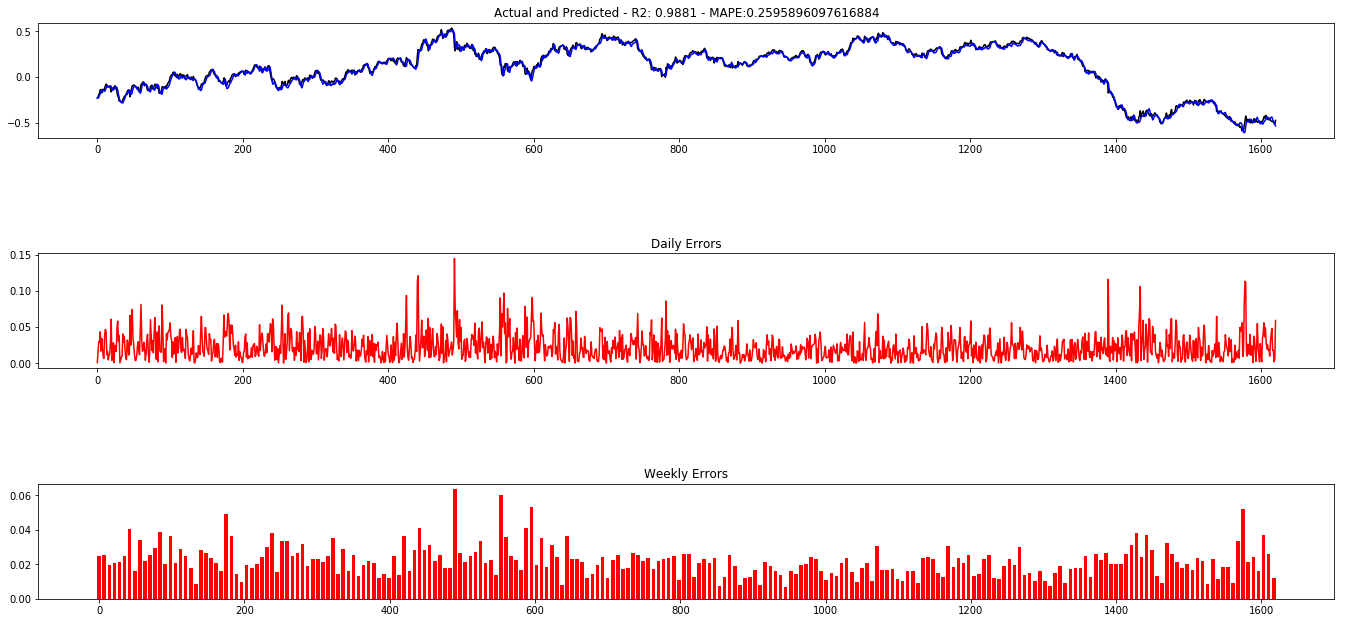

In [47]:
plot_prediction(Y_val, model.predict(X_val))

## Test

In [48]:
norm_test_daily_prices = minmax_norm(test_daily_prices, a=-1, b=1)
norm_test_daily_volumes = minmax_norm(test_daily_volumes, a=-1, b=1)

### NOT normalized

In [49]:
#normalized d_list
d_list = [test_daily_prices, test_daily_volumes]

#NOT normalized d_list
#d_list = [weekly_prices, weekly_volumes]

length = len(d_list[0])
step = 1
forecast = 1
windows = [6, 8, 12]

test_data_dict = {}
for window in windows:
  X = []
  Y = []
  for i in range(0, length, step):
    try:
      # Get windowed data
      windowed_features_list = []
      for j in range(len(d_list)):
        windowed_features_list.append(d_list[j][i:i+window])

      # ALWAYS TAKE THE FIRST data 
      y_i = d_list[0][i + window + forecast - 1] # indexing is important.
      x_i = np.column_stack(tuple(windowed_features_list))
    except Exception as e:
      print(e)
      break

    X.append(x_i)
    Y.append(y_i)
  test_data_dict[window] = {'X': np.array(X), 'Y': np.array(Y)}

index 901 is out of bounds for axis 0 with size 901
index 901 is out of bounds for axis 0 with size 901
index 901 is out of bounds for axis 0 with size 901


### Normalized

In [50]:
#normalized d_list
d_list = [norm_test_daily_prices, norm_test_daily_volumes]

#NOT normalized d_list
#d_list = [weekly_prices, weekly_volumes]

length = len(d_list[0])
step = 1
forecast = 1
windows = [6, 8, 12]

norm_test_data_dict = {}
for window in windows:
  X = []
  Y = []
  for i in range(0, length, step):
    try:
      # Get windowed data
      windowed_features_list = []
      for j in range(len(d_list)):
        windowed_features_list.append(d_list[j][i:i+window])

      # ALWAYS TAKE THE FIRST data 
      y_i = d_list[0][i + window + forecast - 1] # indexing is important.
      x_i = np.column_stack(tuple(windowed_features_list))
    except Exception as e:
      print(e)
      break

    X.append(x_i)
    Y.append(y_i)
  norm_test_data_dict[window] = {'X': np.array(X), 'Y': np.array(Y)}

index 901 is out of bounds for axis 0 with size 901
index 901 is out of bounds for axis 0 with size 901
index 901 is out of bounds for axis 0 with size 901


### result

In [51]:
X_test = norm_test_data_dict[w]['X']
#Y_test = test_data_dict[w]['Y']
not_norm_true_values = test_data_dict[w]['Y']

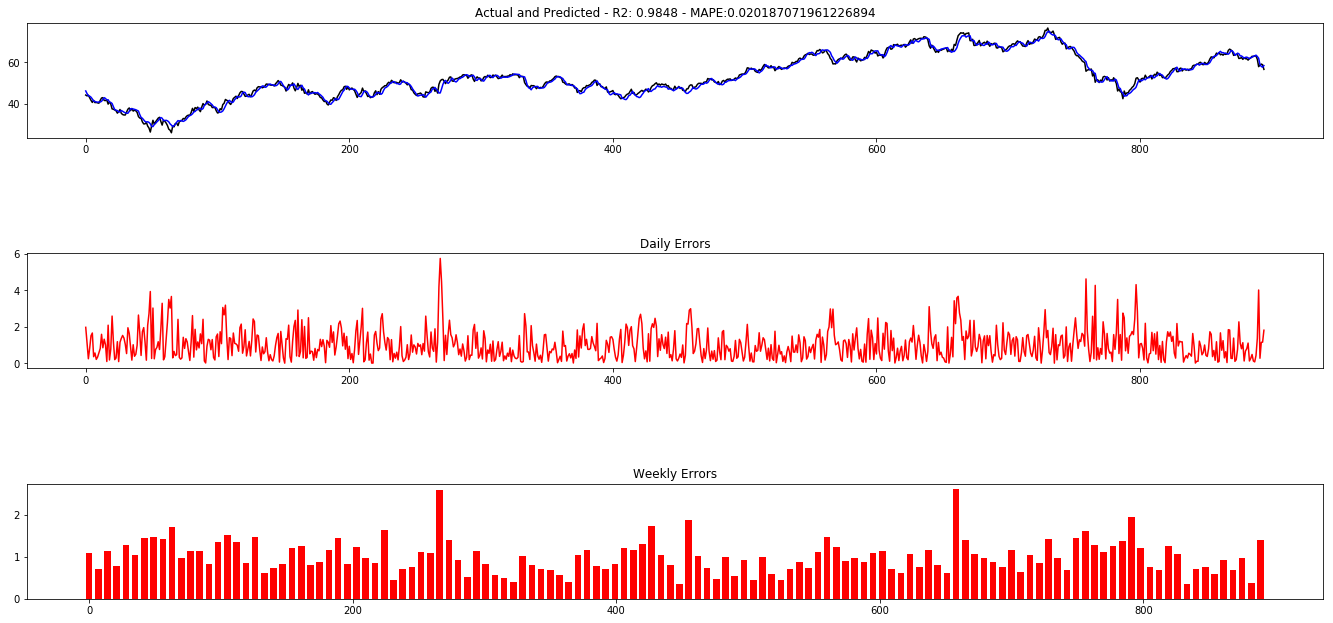

In [52]:
pred_y = model.predict(X_test)
pred_yy = minmax_denorm(test_daily_prices, pred_y, a=-1, b=1)
plot_prediction(not_norm_true_values, pred_yy)

### zoomed

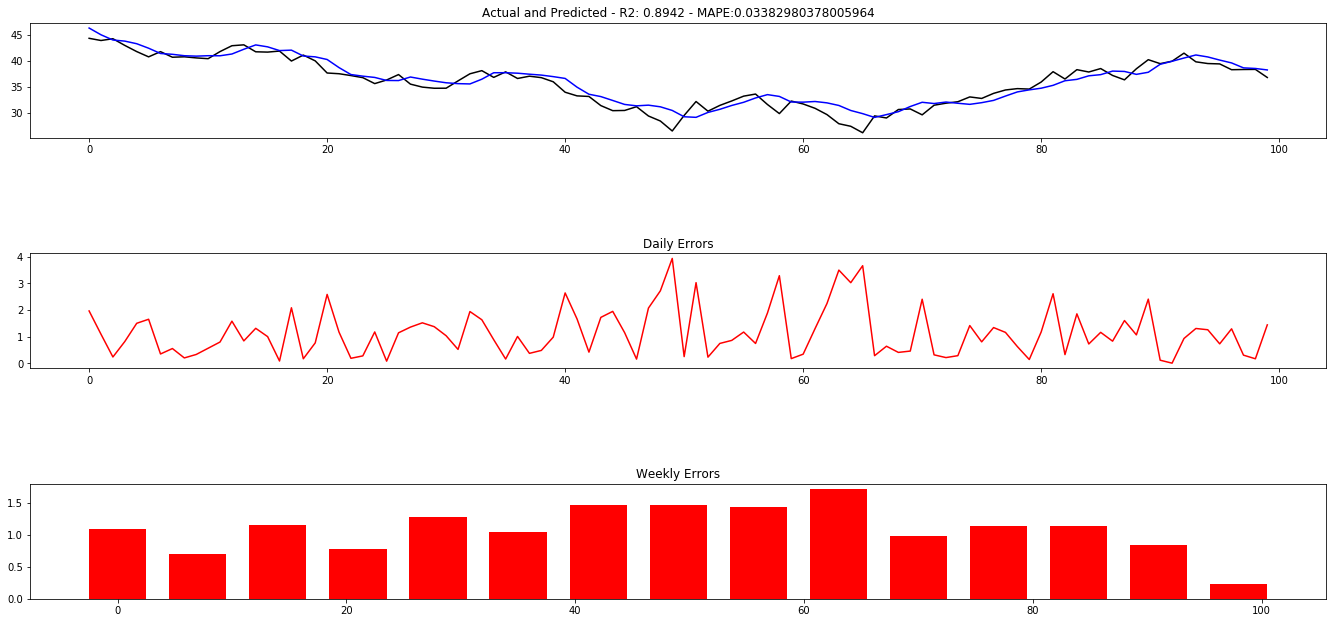

In [53]:
t=0
tp = 100
plot_prediction(not_norm_true_values[t:t+tp], pred_yy[t:t+tp])